In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
survey = pd.read_csv('gaming_health_capstone.csv', encoding='latin-1')
survey

,id,zeitstempel,q1,q2,q3,q4,q5,q6,q7,problems,...,work,degree,birthplace,residence,reference,playstyle,accept,gad_t,swl_t,spin_t
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Singleplayer,Accept,1,23,5.0
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Employed,Bachelor (or equivalent),Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,Employed,Bachelor (or equivalent),USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,Employed,High school diploma (or equivalent),USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,Student at college / university,Master (or equivalent),France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,...,Student at college / university,High school diploma (or equivalent),USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,...,Student at college / university,High school diploma (or equivalent),Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Student at school,High school diploma (or equivalent),Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0


### Dropping unwanted Columns

In [3]:
survey.columns

Index(['id', 'zeitstempel', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'problems', 'qb1', 'qb2', 'qb3', 'qb4', 'qb5', 'qb_total', 'qb_score',
       'games', 'console', 'hour', 'reason', 'important', 'league',
       'highestleague', 'streams', 'spin1', 'spin2', 'spin3', 'spin4', 'spin5',
       'spin6', 'spin7', 'spin8', 'spin9', 'spin10', 'spin11', 'spin12',
       'spin13', 'spin14', 'spin15', 'spin16', 'spin17', 'spin_total',
       'spin_score', 'narcissism', 'gender', 'age', 'work', 'degree',
       'birthplace', 'residence', 'reference', 'playstyle', 'accept', 'gad_t',
       'swl_t', 'spin_t'],
      dtype='object')

In [4]:
survey = survey.drop(columns = {'league','highestleague','streams','birthplace',
                                'residence','reference','accept','gad_t','swl_t',
                                'spin_t','zeitstempel','id'})
survey.head()

,q1,q2,q3,q4,q5,q6,q7,problems,qb1,qb2,...,spin16,spin17,spin_total,spin_score,narcissism,gender,age,work,degree,playstyle
0,0,0,0,0,1,0,0,Not difficult at all,3,5,...,1,0,5,NaN,1.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),Singleplayer
1,1,2,2,2,0,1,0,Somewhat difficult,3,5,...,1,2,33,Moderate,1.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),Multiplayer - online - with strangers
2,0,2,2,0,0,3,1,Not difficult at all,2,6,...,4,2,31,Moderate,4.0,Female,32,Employed,Bachelor (or equivalent),Singleplayer
3,0,0,0,0,0,0,0,Not difficult at all,2,5,...,0,0,11,NaN,2.0,Male,28,Employed,Bachelor (or equivalent),Multiplayer - online - with online acquaintanc...
4,2,1,2,2,2,3,2,Very difficult,2,2,...,3,0,13,NaN,1.0,Male,19,Employed,High school diploma (or equivalent),Multiplayer - online - with strangers


In [5]:
survey = survey.drop(survey[survey['spin_total'] <= 0 ].index)
survey = survey.dropna(subset = ['hour'])
survey.sort_values('spin_total', ascending=True).head()

,q1,q2,q3,q4,q5,q6,q7,problems,qb1,qb2,...,spin16,spin17,spin_total,spin_score,narcissism,gender,age,work,degree,playstyle
2599,0,0,0,0,0,0,0,NaN,4,4,...,0,0,1,NaN,1.0,Male,19,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers
4977,0,0,0,0,0,2,0,Not difficult at all,4,4,...,0,0,1,NaN,2.0,Male,33,Employed,Bachelor (or equivalent),Multiplayer - online - with real life friends
10756,0,0,0,0,0,0,0,Not difficult at all,2,6,...,0,0,1,NaN,1.0,Male,21,Student at college / university,High school diploma (or equivalent),Multiplayer - online - with strangers
7338,0,0,0,0,0,0,0,Not difficult at all,4,7,...,0,0,1,NaN,2.0,Male,21,Student at college / university,Bachelor (or equivalent),Multiplayer - online - with strangers
13071,0,0,0,0,0,0,0,Not difficult at all,6,5,...,0,0,1,NaN,1.0,Male,24,Employed,Master (or equivalent),Multiplayer - online - with real life friends


In [6]:
survey['hour'].sort_values()

6270        0.0
2           0.0
8821        0.0
11339       0.0
12386       0.0
          ...  
4363      120.0
3112      140.0
7615      140.0
13279     150.0
3860     8000.0
Name: hour, Length: 13086, dtype: float64

### Questionnaire A:

In [7]:
survey_quest_a = survey[['q1','q2','q3','q4','q5','q6','q7','problems','games']]
survey_quest_a

,q1,q2,q3,q4,q5,q6,q7,problems,games
0,0,0,0,0,1,0,0,Not difficult at all,Skyrim
1,1,2,2,2,0,1,0,Somewhat difficult,Other
2,0,2,2,0,0,3,1,Not difficult at all,Other
3,0,0,0,0,0,0,0,Not difficult at all,Other
4,2,1,2,2,2,3,2,Very difficult,Other
...,...,...,...,...,...,...,...,...,...
13459,1,0,0,1,0,1,1,Not difficult at all,Other
13460,3,3,3,3,2,3,3,Extremely difficult,League of Legends
13461,0,0,0,0,0,0,0,Not difficult at all,Starcraft 2
13462,3,2,1,3,0,1,3,Somewhat difficult,Other


<Axes: xlabel='problems', ylabel='count'>

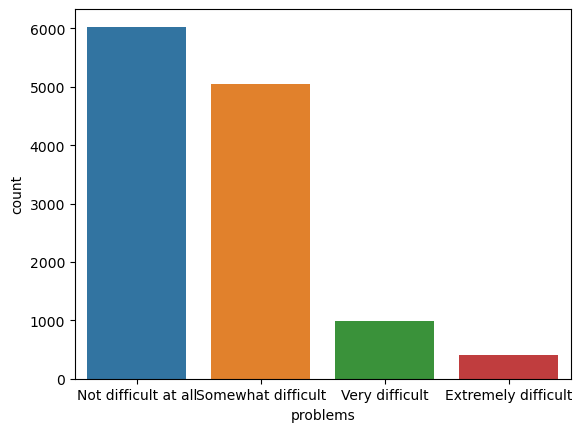

In [8]:
plot_a = survey_quest_a.value_counts('problems').reset_index()
sns.barplot(x = 'problems',
            y = 'count', 
            data = plot_a)   

In [9]:
survey_quest_a.value_counts('games')

games
League of Legends      11003
Other                    984
Starcraft 2              335
Counter Strike           306
World of Warcraft        150
Hearthstone               98
Diablo 3                  88
Heroes of the Storm       41
Guild Wars 2              36
Skyrim                    28
Destiny                   17
Name: count, dtype: int64

In [10]:
league = survey_quest_a[survey_quest_a['games'] == 'League of Legends']
league

,q1,q2,q3,q4,q5,q6,q7,problems,games
11,0,0,0,0,0,0,0,NaN,League of Legends
27,1,0,1,1,0,1,1,Somewhat difficult,League of Legends
33,0,0,0,0,0,0,0,NaN,League of Legends
35,0,0,0,0,0,1,0,Not difficult at all,League of Legends
48,2,2,2,2,1,0,2,Very difficult,League of Legends
...,...,...,...,...,...,...,...,...,...
13455,1,1,2,0,0,2,0,Somewhat difficult,League of Legends
13456,1,1,1,0,0,2,0,Not difficult at all,League of Legends
13457,1,2,2,2,0,0,0,Somewhat difficult,League of Legends
13458,0,1,1,1,0,2,1,Not difficult at all,League of Legends


In [11]:
league = league.value_counts('problems').reset_index()

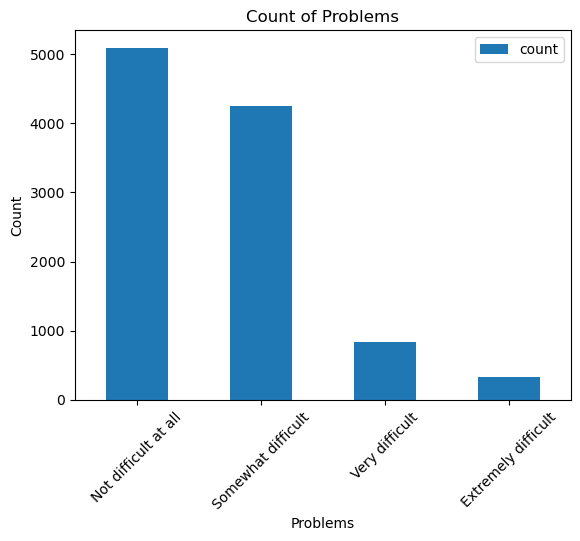

In [12]:
ax = (
    league[['problems','count']]
).plot(kind='bar')
ax.set(title = 'Count of Problems',
      xlabel = 'Problems',
      ylabel = 'Count')
ax.set_xticklabels(['Not difficult at all','Somewhat difficult','Very difficult','Extremely difficult' ])
ax.tick_params(axis='x', rotation=45)

In [13]:
survey.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'problems', 'qb1', 'qb2',
       'qb3', 'qb4', 'qb5', 'qb_total', 'qb_score', 'games', 'console', 'hour',
       'reason', 'important', 'spin1', 'spin2', 'spin3', 'spin4', 'spin5',
       'spin6', 'spin7', 'spin8', 'spin9', 'spin10', 'spin11', 'spin12',
       'spin13', 'spin14', 'spin15', 'spin16', 'spin17', 'spin_total',
       'spin_score', 'narcissism', 'gender', 'age', 'work', 'degree',
       'playstyle'],
      dtype='object')

### Questionnaire B:

In [14]:
survey_quest_b = survey[['qb1','qb2','qb3','qb4','qb5','qb_total']]
survey_quest_b

,qb1,qb2,qb3,qb4,qb5,qb_total
0,3,5,5,5,5,23
1,3,5,2,5,1,16
2,2,6,5,2,2,17
3,2,5,5,3,2,17
4,2,2,4,5,1,14
...,...,...,...,...,...,...
13459,6,6,5,5,6,28
13460,5,5,5,4,4,23
13461,6,6,7,7,6,32
13462,2,6,3,2,3,16


In [15]:
survey_quest_b['qb_score'] = pd.cut(survey_quest_b.qb_total, bins=[0,5,10,14,20,26,30,35], labels=['stongly_disagree', 'disagree', 'slightly_disagree',
                                                                                                   'balaced', 'slightly_agree', 'agree', 'strongly_agree'])
survey_quest_b  

C:\Users\asus\AppData\Local\Temp\ipykernel_24348\2236330455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_quest_b['qb_score'] = pd.cut(survey_quest_b.qb_total, bins=[0,5,10,14,20,26,30,35], labels=['stongly_disagree', 'disagree', 'slightly_disagree',


,qb1,qb2,qb3,qb4,qb5,qb_total,qb_score
0,3,5,5,5,5,23,slightly_agree
1,3,5,2,5,1,16,balaced
2,2,6,5,2,2,17,balaced
3,2,5,5,3,2,17,balaced
4,2,2,4,5,1,14,slightly_disagree
...,...,...,...,...,...,...,...
13459,6,6,5,5,6,28,agree
13460,5,5,5,4,4,23,slightly_agree
13461,6,6,7,7,6,32,strongly_agree
13462,2,6,3,2,3,16,balaced


In [16]:
survey_quest_b[survey_quest_b['qb_score'] == 'strongly_disagree']

,qb1,qb2,qb3,qb4,qb5,qb_total,qb_score


In [17]:
survey_quest_b['qb1'].value_counts().reset_index().sort_values('qb1')

,qb1,count
5,1,1284
0,2,3000
3,3,2053
4,4,1573
1,5,2657
2,6,2133
6,7,386


In [18]:
survey_quest_b['qb2'].value_counts().reset_index().sort_values('qb2')

,qb2,count
6,1,606
4,2,1416
3,3,1637
2,4,1670
1,5,2791
0,6,3617
5,7,1349


In [19]:
survey_quest_b['qb3'].value_counts().reset_index().sort_values('qb3')

,qb3,count
6,1,1015
3,2,1724
2,3,1763
4,4,1589
1,5,2523
0,6,3307
5,7,1165


In [20]:
survey_quest_b['qb4'].value_counts().reset_index().sort_values('qb4')

,qb4,count
5,1,1532
0,2,2689
3,3,1958
4,4,1820
1,5,2332
2,6,1985
6,7,770


In [21]:
survey_quest_b['qb5'].value_counts().reset_index().sort_values('qb5')

,qb5,count
1,1,2671
0,2,2825
2,3,2265
5,4,1288
3,5,1637
4,6,1496
6,7,904


In [22]:
plot_b = survey_quest_b['qb_score'].value_counts().reset_index()
plot_b

,qb_score,count
0,balaced,3478
1,slightly_agree,3457
2,slightly_disagree,1916
3,agree,1886
4,disagree,1330
5,strongly_agree,797
6,stongly_disagree,222


In [23]:
plot_b

,qb_score,count
0,balaced,3478
1,slightly_agree,3457
2,slightly_disagree,1916
3,agree,1886
4,disagree,1330
5,strongly_agree,797
6,stongly_disagree,222


In [24]:
plot_b.to_csv('qb_score.csv',index=False)

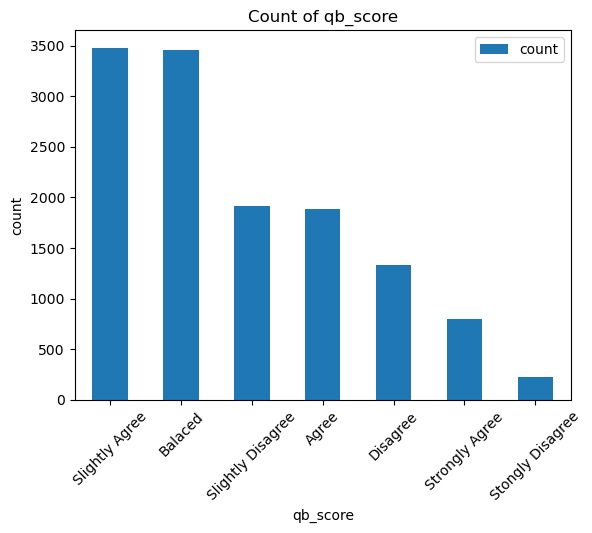

In [25]:
ax = (
    plot_b[['qb_score','count']]
).plot(kind='bar')
ax.set(title = 'Count of qb_score',
      xlabel = 'qb_score',
      ylabel = 'count')
ax.set_xticklabels(['Slightly Agree','Balaced','Slightly Disagree','Agree','Disagree','Strongly Agree','Stongly Disagree' ])
ax.tick_params(axis='x', rotation=45)

### Questionnaire C (Spin): 

In [26]:
survey_quest_c = survey[['spin1','spin2','spin3','spin4','spin5','spin6',
        'spin7','spin8','spin9','spin10','spin11','spin12',
        'spin13','spin14','spin15','spin16','spin17','spin_total','narcissism']]
survey_quest_c

,spin1,spin2,spin3,spin4,spin5,spin6,spin7,spin8,spin9,spin10,spin11,spin12,spin13,spin14,spin15,spin16,spin17,spin_total,narcissism
0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5,1.0
1,2,1,1,3,2,3,1,3,4,0,3,0,1,3,3,1,2,33,1.0
2,1,0,1,2,3,4,2,1,0,1,1,3,0,2,4,4,2,31,4.0
3,2,0,0,1,3,0,0,0,0,0,1,3,0,0,1,0,0,11,2.0
4,2,0,0,0,1,0,0,4,2,0,1,0,0,0,0,3,0,13,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,1,1,1,2,1,0,0,0,0,0,0,0,0,0,1,0,0,7,3.0
13460,0,1,2,2,0,1,3,3,2,1,4,0,2,2,1,0,1,25,2.0
13461,0,1,0,2,0,1,0,2,0,1,1,1,0,1,0,0,0,10,2.0
13462,0,1,3,2,3,4,1,3,4,1,3,1,0,3,2,0,1,32,2.0


In [27]:
survey_quest_c['spin_score'] = pd.cut(survey_quest_c.spin_total, bins=[0,20,30,40,50,68], labels=['none', 'mild', 'moderate','severe', 'very severe'])
survey_quest_c.head(50)   

C:\Users\asus\AppData\Local\Temp\ipykernel_24348\1380283391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survey_quest_c['spin_score'] = pd.cut(survey_quest_c.spin_total, bins=[0,20,30,40,50,68], labels=['none', 'mild', 'moderate','severe', 'very severe'])


,spin1,spin2,spin3,spin4,spin5,spin6,spin7,spin8,spin9,spin10,spin11,spin12,spin13,spin14,spin15,spin16,spin17,spin_total,narcissism,spin_score
0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5,1.0,none
1,2,1,1,3,2,3,1,3,4,0,3,0,1,3,3,1,2,33,1.0,moderate
2,1,0,1,2,3,4,2,1,0,1,1,3,0,2,4,4,2,31,4.0,moderate
3,2,0,0,1,3,0,0,0,0,0,1,3,0,0,1,0,0,11,2.0,none
4,2,0,0,0,1,0,0,4,2,0,1,0,0,0,0,3,0,13,1.0,none
5,1,1,2,3,2,1,0,0,0,1,0,0,0,1,1,0,0,13,2.0,none
6,1,2,2,3,1,1,1,2,3,1,3,1,0,1,2,1,1,26,2.0,mild
8,1,1,4,4,4,4,4,4,3,3,4,4,2,4,4,2,3,55,1.0,very severe
9,1,1,1,1,3,3,0,1,2,2,3,1,0,3,2,0,2,26,1.0,mild
10,0,0,0,1,1,1,0,0,0,0,0,0,0,2,1,0,0,6,1.0,none


In [28]:
survey_quest_c.sort_values('spin_total', ascending = False)

,spin1,spin2,spin3,spin4,spin5,spin6,spin7,spin8,spin9,spin10,spin11,spin12,spin13,spin14,spin15,spin16,spin17,spin_total,narcissism,spin_score
8856,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,68,1.0,very severe
973,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,68,1.0,very severe
6813,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,68,3.0,very severe
3860,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,68,5.0,very severe
9820,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,68,1.0,very severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,3.0,none
3495,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2.0,none
6188,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.0,none
1084,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,none


In [29]:
plot_c = survey_quest_c.value_counts('spin_score').reset_index()
plot_c

,spin_score,count
0,none,7642
1,mild,2686
2,moderate,1600
3,severe,790
4,very severe,368


<Axes: xlabel='spin_score', ylabel='count'>

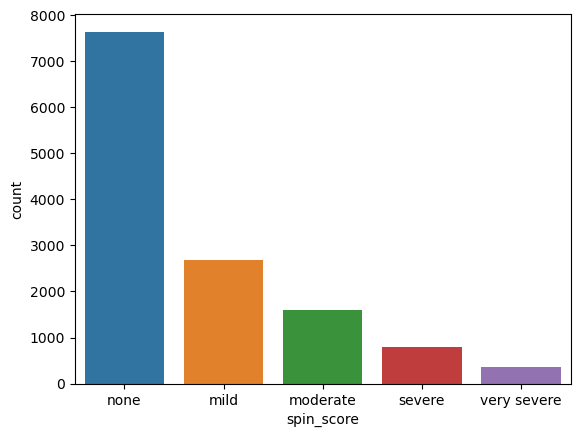

In [30]:
sns.barplot(x = 'spin_score',
            y = 'count', 
            data = plot_c)   

###  Education and Videogame habits


In [31]:
survey.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'problems', 'qb1', 'qb2',
       'qb3', 'qb4', 'qb5', 'qb_total', 'qb_score', 'games', 'console', 'hour',
       'reason', 'important', 'spin1', 'spin2', 'spin3', 'spin4', 'spin5',
       'spin6', 'spin7', 'spin8', 'spin9', 'spin10', 'spin11', 'spin12',
       'spin13', 'spin14', 'spin15', 'spin16', 'spin17', 'spin_total',
       'spin_score', 'narcissism', 'gender', 'age', 'work', 'degree',
       'playstyle'],
      dtype='object')

In [32]:
work_play = survey[['hour', 'work']]
work_play

,hour,work
0,15.0,Unemployed / between jobs
1,8.0,Unemployed / between jobs
2,0.0,Employed
3,20.0,Employed
4,20.0,Employed
...,...,...
13459,40.0,Student at college / university
13460,20.0,Student at college / university
13461,20.0,Student at college / university
13462,5.0,Student at school


In [33]:
# Shows the average weekly play time 
work = work_play.groupby('work')['hour'].mean().reset_index()
work['hour'] = work['hour'].round()
work

,work,hour
0,Employed,20.0
1,Student at college / university,21.0
2,Student at school,22.0
3,Unemployed / between jobs,33.0
